# **Data processing**

For this step, I am looking to:
- clean the data (e.g. removing empty reviews & special characters, performing feature transformation if needed);
- understanding the particularities of this data (e.g. looking at the distribution of each feature, understanding the relationship between the different features)


Useful articles for the Explaratory Data Analysis (EDA) process:
* Exploratory Data Analysis Cheatsheet (everything you might need) - https://datasans.medium.com/exploratory-data-analysis-cheatsheet-everything-you-might-need-36230538484d
* 10 Automated EDA Tools That Will Save You Hours Of Work - https://medium.com/@riteshgupta.ai/10-automated-eda-tools-that-will-save-you-hours-of-work-b3edf3740fc2
---

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the data
gameid=892970
data= pd.read_csv("Data/"+str(gameid)+".csv")
data.head()

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,written_during_early_access,hidden_in_steam_china,steam_china_location,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,140348666,english,I played this for 99 minutes EXACTLY. and I HA...,1687201179,1687201179,False,0,0,0.00000,0,...,True,True,NaN,76561198090007828,80,78,99,0,99,1614510611
1,140347990,english,"this game is amazing, and even better with the...",1687200393,1687200393,True,0,0,0.00000,0,...,True,True,NaN,76561199501472502,0,3,1785,1785,1754,1687202643
2,140347860,english,GAME IS horrible gave me fucking cancer sound,1687200233,1687200233,False,1,0,0.52381,1,...,True,True,NaN,76561199469648869,10,1,1163,180,1163,1687200165
3,140345029,english,The only bad thing about this game is the amou...,1687196855,1687196855,True,0,0,0.00000,0,...,True,True,NaN,76561198082594466,0,4,23089,2,23088,1687196885
4,140343169,english,nice,1687194571,1687194571,True,0,0,0.00000,0,...,True,True,NaN,76561198112578500,20,2,2980,123,2857,1687201992


In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244655 entries, 0 to 244654
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   recommendationid             244655 non-null  int64  
 1   language                     244655 non-null  object 
 2   review                       243796 non-null  object 
 3   timestamp_created            244655 non-null  int64  
 4   timestamp_updated            244655 non-null  int64  
 5   voted_up                     244655 non-null  bool   
 6   votes_up                     244655 non-null  int64  
 7   votes_funny                  244655 non-null  int64  
 8   weighted_vote_score          244655 non-null  float64
 9   comment_count                244655 non-null  int64  
 10  steam_purchase               244655 non-null  bool   
 11  received_for_free            244655 non-null  bool   
 12  written_during_early_access  244655 non-null  bool   
 13 

In [4]:
data.shape

(244655, 22)

In [20]:
# Overall summary stats
data.describe()

,recommendationid,timestamp_created,timestamp_updated,votes_up,votes_funny,weighted_vote_score,comment_count,steam_china_location,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
count,2.446550e+05,2.446550e+05,2.446550e+05,244655.000000,244655.000000,244655.000000,244655.000000,0.0,2.446550e+05,244655.000000,244655.000000,2.446550e+05,244655.000000,244655.000000,2.446550e+05
mean,9.746908e+07,1.628263e+09,1.629793e+09,0.942822,0.197368,0.126076,0.040273,NaN,7.656120e+16,78.346827,11.359923,1.130402e+04,61.634498,4154.193325,1.663589e+09
std,1.485207e+07,2.041972e+07,2.132069e+07,38.938885,10.345051,0.221211,0.910162,NaN,3.751221e+08,227.717318,24.045755,1.828825e+04,448.461893,7884.338301,2.301677e+07
min,8.582536e+07,1.612278e+09,1.612278e+09,0.000000,0.000000,0.000000,0.000000,NaN,7.656120e+16,0.000000,1.000000,1.000000e+00,0.000000,5.000000,1.612280e+09
25%,8.730957e+07,1.614109e+09,1.614213e+09,0.000000,0.000000,0.000000,0.000000,NaN,7.656120e+16,0.000000,2.000000,3.057000e+03,0.000000,720.000000,1.648380e+09
50%,8.895030e+07,1.616514e+09,1.617068e+09,0.000000,0.000000,0.000000,0.000000,NaN,7.656120e+16,0.000000,5.000000,6.556000e+03,0.000000,1971.000000,1.672941e+09
75%,1.042739e+08,1.637991e+09,1.639429e+09,0.000000,0.000000,0.000000,0.000000,NaN,7.656120e+16,73.000000,12.000000,1.300600e+04,0.000000,4701.000000,1.680962e+09
max,1.403487e+08,1.687201e+09,1.687201e+09,12801.000000,3819.000000,0.987343,227.000000,NaN,7.656120e+16,19536.000000,2552.000000,1.216607e+06,20036.000000,611715.000000,1.687205e+09


---
### Column renaming
Column 'voted_up' is used to indicate whether the reviewer recommends or not the game to the audience. For clarity and not avoid confusion with 'votes_up' (amount of thumbs up or helpfulness votes received by the review), I will rename the column as 'recommended'.

<img src="Images/recommended_or_not.jpg" width=800 height=800 />

In [21]:
data.rename(columns={"voted_up": "recommended"}, inplace=True)

---
### Boolean/binary features

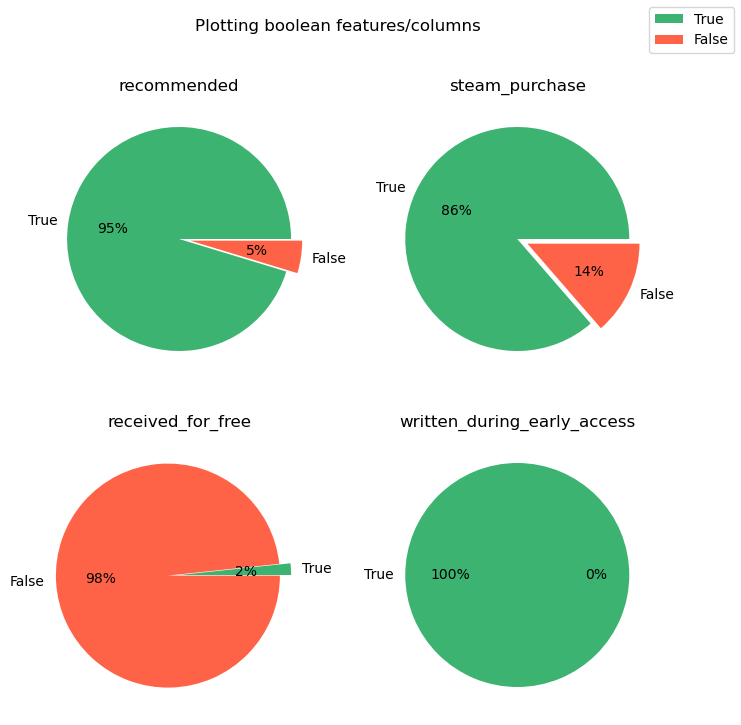

In [22]:
# Boolean/binary features plotting
bools=['recommended', 'steam_purchase', 'received_for_free', 'written_during_early_access']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Plotting boolean features/columns')
a=[ax1, ax2, ax3, ax4]
inc=0
reorderindex=[True, False]
colors={True: 'mediumseagreen', False:'tomato'}
for i in bools:
    col=data[i].value_counts().reindex(reorderindex)
    a[inc]=col.plot(ax=a[inc],kind='pie', figsize=(8,8),autopct='%1.0f%%', title=i, 
                                                             explode=[0,0.1], colors=[colors[v] for v in col.keys()])
    a[inc].set_ylabel('')
    inc+=1
fig.legend(reorderindex,loc='outside upper right')

---
### Removing redundant features
**language** (all collected reviews are in english) <br>
**steam_china_location** (due to no variation)<br>
**hidden_in_steam_china** (not meaningful for the purpose of this analysis)<br>
**written_during_early_access** (the game is currently still in early access)

In [23]:
data.drop(columns=['language', 'steam_china_location', 'hidden_in_steam_china','written_during_early_access'], inplace=True)

---
### Checking for missing data

In [24]:
# Checking for missing data
data.isnull().sum()

recommendationid             0
review                     859
timestamp_created            0
timestamp_updated            0
recommended                  0
votes_up                     0
votes_funny                  0
weighted_vote_score          0
comment_count                0
steam_purchase               0
received_for_free            0
steamid                      0
num_games_owned              0
num_reviews                  0
playtime_forever             0
playtime_last_two_weeks      0
playtime_at_review           0
last_played                  0
dtype: int64

> **Observation:** dropping the 859 rows that have no data in the 'review' column as the purpose of this analysis is to look at the content of the reviews 

In [25]:
data.dropna(inplace=True)
data.reset_index(drop=True)

,recommendationid,review,timestamp_created,timestamp_updated,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,140348666,I played this for 99 minutes EXACTLY. and I HA...,1687201179,1687201179,False,0,0,0.000000,0,False,False,76561198090007828,80,78,99,0,99,1614510611
1,140347990,"this game is amazing, and even better with the...",1687200393,1687200393,True,0,0,0.000000,0,True,False,76561199501472502,0,3,1785,1785,1754,1687202643
2,140347860,GAME IS horrible gave me fucking cancer sound,1687200233,1687200233,False,1,0,0.523810,1,True,False,76561199469648869,10,1,1163,180,1163,1687200165
3,140345029,The only bad thing about this game is the amou...,1687196855,1687196855,True,0,0,0.000000,0,True,False,76561198082594466,0,4,23089,2,23088,1687196885
4,140343169,nice,1687194571,1687194571,True,0,0,0.000000,0,True,False,76561198112578500,20,2,2980,123,2857,1687201992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243791,85826461,Dont think. buy.\r\n\r\nEdit: I HAVE NOT CHANG...,1612279456,1612455757,True,15,1,0.460619,0,True,False,76561198042204583,323,4,3686,0,8,1673931076
243792,85826358,Watch out for falling trees!,1612279324,1612279324,True,173,108,0.819791,0,False,False,76561198016445504,0,2,6702,0,2385,1683188751
243793,85825877,A great adventure awaits!\r\n\r\nThe gameplay ...,1612278806,1612352399,True,3,0,0.469194,0,False,True,76561197971386286,597,7,10346,0,393,1671348612
243794,85825517,A fantastic survival exploration game set in a...,1612278425,1612292462,True,69,3,0.554322,0,False,True,76561198067654166,0,5,14645,0,1152,1676156816


In [26]:
# checking if the null rows have been removed
data.isnull().sum()

recommendationid           0
review                     0
timestamp_created          0
timestamp_updated          0
recommended                0
votes_up                   0
votes_funny                0
weighted_vote_score        0
comment_count              0
steam_purchase             0
received_for_free          0
steamid                    0
num_games_owned            0
num_reviews                0
playtime_forever           0
playtime_last_two_weeks    0
playtime_at_review         0
last_played                0
dtype: int64

In [27]:
data.shape #244655-859=243796

(243796, 18)

---
### Timedate features

> __Features documentation__ (according to https://partner.steamgames.com/doc/store/getreviews)
- __timestamp_created__ - date the review was created (unix timestamp)
- __timestamp_updated__ - date the review was last updated (unix timestamp)
- __playtime_forever__ - lifetime playtime tracked in this app
- __playtime_last_two_weeks__ - playtime tracked in the past two weeks for this app
- __playtime_at_review__ - playtime when the review was written
- __last_played__ - time for when the user last played (unix timestamp)

Note: data was downloaded on 19-06-2023 at 9 PM GMT

#### 1. We start by transforming the timestamp features from _UNIX_ to _UTC_ format

In [28]:
#transforming from unix to UTC data time format 

list_utc=['timestamp_created','timestamp_updated', 'last_played']
for col in list_utc:
    data[col+'_utc'] =pd.to_datetime(data[col], unit='s')

In [29]:
data[['recommendationid','review','timestamp_created_utc','timestamp_updated_utc', 'last_played_utc']].head()

,recommendationid,review,timestamp_created_utc,timestamp_updated_utc,last_played_utc
0,140348666,I played this for 99 minutes EXACTLY. and I HA...,2023-06-19 18:59:39,2023-06-19 18:59:39,2021-02-28 11:10:11
1,140347990,"this game is amazing, and even better with the...",2023-06-19 18:46:33,2023-06-19 18:46:33,2023-06-19 19:24:03
2,140347860,GAME IS horrible gave me fucking cancer sound,2023-06-19 18:43:53,2023-06-19 18:43:53,2023-06-19 18:42:45
3,140345029,The only bad thing about this game is the amou...,2023-06-19 17:47:35,2023-06-19 17:47:35,2023-06-19 17:48:05
4,140343169,nice,2023-06-19 17:09:31,2023-06-19 17:09:31,2023-06-19 19:13:12


2. We transform _playtime_ features from having a unit of measurement in minutes to a unit of hours

According to Steam API documentation (https://partner.steamgames.com/doc/store/getreviews), **playtime_forever**, **playtime_last_two_weeks** and **playtime_at_review** have **minutes** as the unit of measurements 

In [30]:
#To make these columns more readable I will transform them into hours and round the decimals to 1 digit
spent_list=['playtime_forever', 'playtime_last_two_weeks','playtime_at_review']
for col_spent in spent_list:
    data[col_spent+'_hour']=round(data[col_spent]/60,1)

3. We pick up five reviews to validate the new columns: timedate features in UTC format and playtime in hours. We do so by comparing with the information available on the Steam website.

#### Review 1 

In [31]:
x=data[['review','playtime_at_review','playtime_at_review_hour','timestamp_created_utc','timestamp_updated_utc'
       ]].loc[data['comment_count']==73]
with pd.option_context('display.max_colwidth', None):
    print(x)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    revi

> - _Timestamp in UTC_: 2602 minutes / 60 = 43.367 or ~43.4 hours _which matches what it is displayed on the Steam website!_
> - _Playtime_: the creation date of 20th of Feb 2021 & time of 01:58 am also matches what it is on the website 


<img src="Images/73_.jpg" width=600 height=600 />

#### Review 2

In [32]:
x=data[['review','playtime_at_review','playtime_at_review_hour','timestamp_created_utc','timestamp_updated_utc'
       ]].loc[data['comment_count']==136]
with pd.option_context('display.max_colwidth', None):
    print(x)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             review  \
121011  i'm a 63 year old gamer.  Been playing since 1977 when the Atari 2600 came out with "Pong" as the big thing. I have primarily enjoyed open-world exploration games, like Oblivion, Skyrim, and Fallout4, which I have played many hours on.   I have alre

> - _Timestamp in UTC_: 33307 hours / 60 = 555.1167 or ~ 555.1 _which matches what it is displayed on the Steam website!_
> - _Playtime_: creation date of 24th March 2021 and time of 09:59 am also matches what it is on the website
<img src="Images/136.jpg" width=600 height=600 />

#### Review 3

In [33]:
x=data[['review','playtime_at_review','playtime_at_review_hour','timestamp_created_utc','timestamp_updated_utc'
       ]].loc[data['comment_count']==172]
with pd.option_context('display.max_colwidth', 500):
    print(x)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     review  \
218794  I wanted to wait until I had 100 hours into this game to give it a review. I wanted to have plenty of time put into it with it being an early access title. I've played mainly solo, most games like this I do, just a personal preference until I have beat the game. This game is an early access, the only bug I have ran into is an item tooltip describing what the item is. The game feels completed even though it is not. You can’t say that for a lot of early access games now a days.\

> - _Timestamp in UTC_: 5999 hours / 60 = 99.983 or ~ 100 hours _which matches what it is displayed on the Steam website!_
> - _Playtime_: Creation date of 15th Feb 2021 at 03.56 am & update date of 20th Feb 2021 at 3.50 pm also matches what is on the website
<img src="Images/172.jpg" width=600 height=600 />

#### Review 4

In [34]:
x=data[['review','playtime_at_review','playtime_at_review_hour','timestamp_created_utc','timestamp_updated_utc'
       ]].loc[data['recommendationid']==138275406]
with pd.option_context('display.max_colwidth', 1000):
    print(x)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 review  \
1965  This game was great until I was exploring the plains and was killed by a mosquito, then after I respawned two more mosquito's spawned In next to my basic little hut I made after crossing the sea, one of the mosquito's managed to fly through a window and is now trapped in my hous

> - _Timestamp in UTC_: 3167 hours / 60 = 52.783 or ~ 52.8 hours _which matches what it is displayed on the Steam website!_
> - _Playtime_: Creation date of 14th May 2023 at 06.25 am & update date of 14th May 2023 at 1.12 pm which are both __1h behind__ the time displayed on the website
<img src="Images/12.jpg" width=600 height=600 />

#### Review 5

In [35]:
x=data[['review','playtime_at_review','playtime_at_review_hour','timestamp_created_utc','timestamp_updated_utc'
       ]].loc[data['recommendationid']==138471899]
with pd.option_context('display.max_colwidth', None):
    print(x)

                                                                                                                                                                                                                                                                                                                                                                                                                                           review  \
1739  Viking do building,\r\nViking do farming,\r\nViking do hunting,\r\nViking do bee keeping,\r\nViking do exploring,\r\nViking do more building,\r\nViking do cooking,\r\nViking do animal husbandry,\r\nViking do boat ride,\r\nViking do fishing,\r\nViking do dream of Valhalla, \r\nViking do raid,\r\nViking get raided,\r\nViking do mead brewing,\r\nViking do more and more building,\r\nViking make home, not house,\r\nViking happy.   

      playtime_at_review  playtime_at_review_hour timestamp_created_utc  \
1739                3262                     54.4 

> - _Timestamp in UTC_: 3262 hours / 60 = 54.367 or ~ 54.4 hours _which matches what it is displayed on the Steam website!_
> - _Playtime_: Creation date of 18th May 2023 at 06.12 am which is __1h behind__ the time displayed on the website
<img src="Images/138471899.jpg" width=600 height=600 />

---
#### **Observation**: 
* Reviews 4 & 5 indicate an hour difference between the time shown on Steam versus the data collected.
* Reviews 4 & 5 were posted in May, while the first three reviews were posted in February and March, 24th.
* The most likely explaination for this is the daylight saving, considering that the clocks went forward in Ireland on 26th March 2023 at 1 am. 
* This one hour difference does not affect this analysis as I am planning to use month and year as the granularity for the date.
---

#### Creating month-year version of the timestamp variables 

In [37]:
#adding month-year
for col in list_utc:
    data[col+'_utc_ym']=data[col+'_utc'].dt.to_period('M')

In [38]:
data.head()

,recommendationid,review,timestamp_created,timestamp_updated,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,...,last_played,timestamp_created_utc,timestamp_updated_utc,last_played_utc,playtime_forever_hour,playtime_last_two_weeks_hour,playtime_at_review_hour,timestamp_created_utc_ym,timestamp_updated_utc_ym,last_played_utc_ym
0,140348666,I played this for 99 minutes EXACTLY. and I HA...,1687201179,1687201179,False,0,0,0.00000,0,False,...,1614510611,2023-06-19 18:59:39,2023-06-19 18:59:39,2021-02-28 11:10:11,1.6,0.0,1.6,2023-06,2023-06,2021-02
1,140347990,"this game is amazing, and even better with the...",1687200393,1687200393,True,0,0,0.00000,0,True,...,1687202643,2023-06-19 18:46:33,2023-06-19 18:46:33,2023-06-19 19:24:03,29.8,29.8,29.2,2023-06,2023-06,2023-06
2,140347860,GAME IS horrible gave me fucking cancer sound,1687200233,1687200233,False,1,0,0.52381,1,True,...,1687200165,2023-06-19 18:43:53,2023-06-19 18:43:53,2023-06-19 18:42:45,19.4,3.0,19.4,2023-06,2023-06,2023-06
3,140345029,The only bad thing about this game is the amou...,1687196855,1687196855,True,0,0,0.00000,0,True,...,1687196885,2023-06-19 17:47:35,2023-06-19 17:47:35,2023-06-19 17:48:05,384.8,0.0,384.8,2023-06,2023-06,2023-06
4,140343169,nice,1687194571,1687194571,True,0,0,0.00000,0,True,...,1687201992,2023-06-19 17:09:31,2023-06-19 17:09:31,2023-06-19 19:13:12,49.7,2.0,47.6,2023-06,2023-06,2023-06


---
### Removing the remaining timedata features (in unix and second units)

In [42]:
data.drop(columns=list_utc+spent_list, inplace=True)

In [43]:
data.head()

,recommendationid,review,recommended,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,steamid,...,num_reviews,timestamp_created_utc,timestamp_updated_utc,last_played_utc,playtime_forever_hour,playtime_last_two_weeks_hour,playtime_at_review_hour,timestamp_created_utc_ym,timestamp_updated_utc_ym,last_played_utc_ym
0,140348666,I played this for 99 minutes EXACTLY. and I HA...,False,0,0,0.00000,0,False,False,76561198090007828,...,78,2023-06-19 18:59:39,2023-06-19 18:59:39,2021-02-28 11:10:11,1.6,0.0,1.6,2023-06,2023-06,2021-02
1,140347990,"this game is amazing, and even better with the...",True,0,0,0.00000,0,True,False,76561199501472502,...,3,2023-06-19 18:46:33,2023-06-19 18:46:33,2023-06-19 19:24:03,29.8,29.8,29.2,2023-06,2023-06,2023-06
2,140347860,GAME IS horrible gave me fucking cancer sound,False,1,0,0.52381,1,True,False,76561199469648869,...,1,2023-06-19 18:43:53,2023-06-19 18:43:53,2023-06-19 18:42:45,19.4,3.0,19.4,2023-06,2023-06,2023-06
3,140345029,The only bad thing about this game is the amou...,True,0,0,0.00000,0,True,False,76561198082594466,...,4,2023-06-19 17:47:35,2023-06-19 17:47:35,2023-06-19 17:48:05,384.8,0.0,384.8,2023-06,2023-06,2023-06
4,140343169,nice,True,0,0,0.00000,0,True,False,76561198112578500,...,2,2023-06-19 17:09:31,2023-06-19 17:09:31,2023-06-19 19:13:12,49.7,2.0,47.6,2023-06,2023-06,2023-06


In [44]:
#Saving the cleaned version of the data
data.to_csv('Data/'+ str(gameid)+'_clean.csv', index=False)

#### Next steps:
* Data exploration using univariate, bivariate and multivariate analysis -> asking and answering questions about that the data
* Pushing the data to a free cloud DB (maybe PostgreSQL, e.g. Supabase and NoSQL, e.g. MondoDB Atlas)